In [82]:
import pandas as pd
from pathlib import Path
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
#import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

#!pip install pybaseball
#!pip install xgboost

### Load & Review Dataframes

In [83]:
#Read in Mariners 2022 season csv files from resources folder (mariners_2022_X and mariners_2022_y)
X = pd.read_csv(
    Path('./Resources/mariners_2022_X.csv'),
    index_col=[0],
)

y = pd.read_csv(
    Path('./Resources/mariners_2022_y.csv'),
    index_col=[0],
)

In [106]:
#Review dataframes
display(X)
display(y)

,Rank,Home_Away_@,Home_Away_Home,Opp_ATL,Opp_BAL,Opp_BOS,Opp_CHW,Opp_CLE,Opp_DET,Opp_HOU,...,Opp_NYY,Opp_OAK,Opp_PHI,Opp_SDP,Opp_TBR,Opp_TEX,Opp_TOR,Opp_WSN,D/N_D,D/N_N
1,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5,3.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
159,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
160,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
161,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


,W/L
1,1
2,1
3,0
4,0
5,0
...,...
158,0
159,0
160,1
161,1


### Split Data into Training and Testing Sets

In [84]:
# split data using test_train_split w/ random_state=1 and default test size of 25%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=1)

In [85]:
y_test.value_counts()

W/L
1      23
0      18
dtype: int64

### Normalize Data with StandardScaler

In [86]:
# Create the StandardScaler instance
scaler = StandardScaler()

In [87]:
# Fit the scaler to the features training dataset
X_scaler = scaler.fit(X_train)

In [88]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

### Logistic Regression Model

In [89]:
# Create a LogisticRegression Model with the original data

# Instantiate the Logistic Regression Model w/ random_state = 1
model = LogisticRegression(random_state=1)

# Fit the model using training data
lr_model = model.fit(X_train_scaled, y_train)

In [90]:
# Make predictions using testing data
y_pred = lr_model.predict(X_test_scaled)
# do we need training predictions if not doing a confusion matrix?


In [91]:
#Evaluation metrics
print(balanced_accuracy_score(y_test, y_pred))

0.5640096618357487


In [92]:
# Generate confusion matrix
confusion_matrix(y_test, y_pred)

array([[ 7, 11],
       [ 6, 17]], dtype=int64)

In [93]:
TN, FP, FN, TP = confusion_matrix(y_test, y_pred).ravel()
print('True Positive(TP) = ', TP)
print('False Positive(FP) = ', FP)
print('True Negative(TN) = ', TN)
print('False Negative(FN) = ', FN)

True Positive(TP) =  17
False Positive(FP) =  11
True Negative(TN) =  7
False Negative(FN) =  6


In [94]:
# Generate classificaiton report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.54      0.39      0.45        18
           1       0.61      0.74      0.67        23

    accuracy                           0.59        41
   macro avg       0.57      0.56      0.56        41
weighted avg       0.58      0.59      0.57        41



### XGBoost aka Extreme Gradient Boosting

In [95]:
# Instantiate XGBoost Model w/ random_state = 1
model = XGBClassifier(random_state=1)

In [96]:
# Fit the model using the scaled training data
XGBModel = model.fit(X_train_scaled, y_train)

In [97]:
# Make predictions for test data
y_pred = XGBModel.predict(X_test_scaled)

# convert prediction percentages to binary
predictions = [round(value) for value in y_pred]

In [98]:
accuracy = accuracy_score(y_test, predictions)
accuracy

0.5609756097560976

In [99]:
# Generate confusion matrix
confusion_matrix(y_test, y_pred)

array([[ 8, 10],
       [ 8, 15]], dtype=int64)

In [100]:
TN, FP, FN, TP = confusion_matrix(y_test, y_pred).ravel()
print('True Positive(TP) = ', TP)
print('False Positive(FP) = ', FP)
print('True Negative(TN) = ', TN)
print('False Negative(FN) = ', FN)

True Positive(TP) =  15
False Positive(FP) =  10
True Negative(TN) =  8
False Negative(FN) =  8


In [101]:
# Generate classificaiton report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.50      0.44      0.47        18
           1       0.60      0.65      0.63        23

    accuracy                           0.56        41
   macro avg       0.55      0.55      0.55        41
weighted avg       0.56      0.56      0.56        41



## Model Initialization and for loop

In [102]:
# Initialize each binary classifier
models = {}
models['Logistic Regression'] = LogisticRegression()
models['XGBoost'] = XGBClassifier()

In [103]:
# Performance Eval
accuracy, precision, recall = {}, {}, {}

for key in models.keys():
    
    # fit the classifier
    models[key].fit(X_train_scaled, y_train)
    
    # make predictions
    predictions = models[key].predict(X_test_scaled)
    
    # calculate metrics
    accuracy[key] = accuracy_score(predictions, y_test)
    precision[key] = precision_score(predictions, y_test)
    recall[key] = recall_score(predictions, y_test)

## Results

In [104]:
df_model = pd.DataFrame(index=models.keys(), columns=["Accuracy", "Precision", "Recall"])
df_model['Accuracy'] = accuracy.values()
df_model['Precision'] = precision.values()
df_model['Recall'] = recall.values()

df_model

,Accuracy,Precision,Recall
Logistic Regression,0.585366,0.739130,0.607143
XGBoost,0.560976,0.652174,0.600000


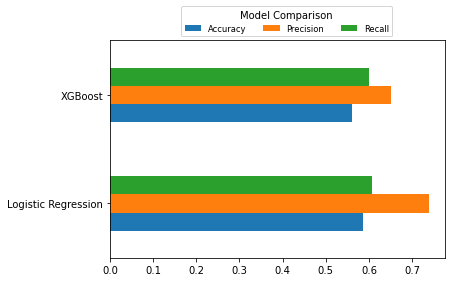

In [105]:
ax  = df_model.plot.barh()
ax.legend(
    ncol=3,
    title="Model Comparison",
    bbox_to_anchor=(.2,1),
    fontsize='small'
)